/tmp/ipython-input-2467349873.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = le_sex.fit_transform(X["Sex"])
/tmp/ipython-input-2467349873.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"] = le_embarked.fit_transform(X["Embarked"])
/tmp/ipython-input-2467349873.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

Decision Tree Accuracy: 0.7988826815642458


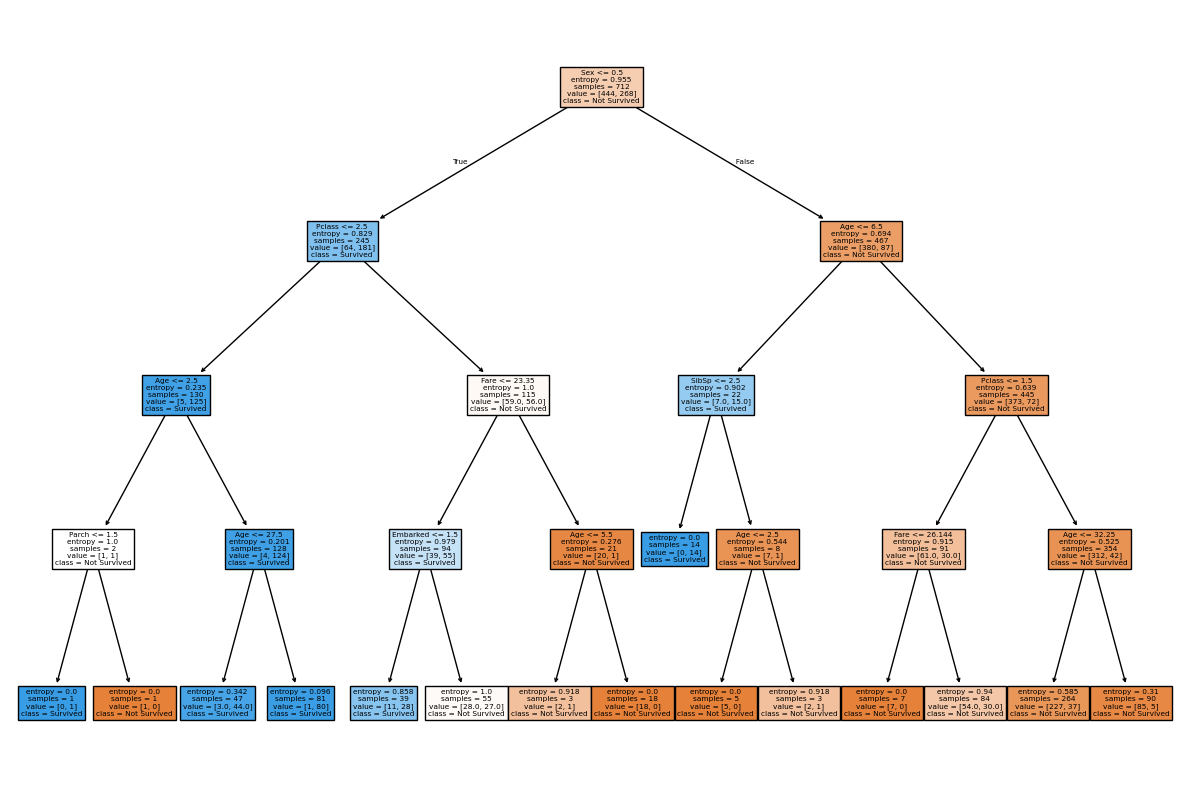

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 2: Load dataset
df = pd.read_csv("/content/titanic.csv")

# Step 3: Select features and target
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = df["Survived"]

# Step 4: Handle categorical values
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

X["Sex"] = le_sex.fit_transform(X["Sex"])
X["Embarked"] = le_embarked.fit_transform(X["Embarked"])

# Step 5: Handle missing values (fill with mean or mode)
X["Age"] = X["Age"].fillna(X["Age"].mean())
X["Embarked"] = X["Embarked"].fillna(X["Embarked"].mode()[0])

# Step 6: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 7: Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Step 8: Evaluate accuracy
accuracy = clf.score(X_test, y_test)
print("Decision Tree Accuracy:", accuracy)

# Step 9: Visualize the tree
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()


/tmp/ipython-input-2169672826.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2169672826.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

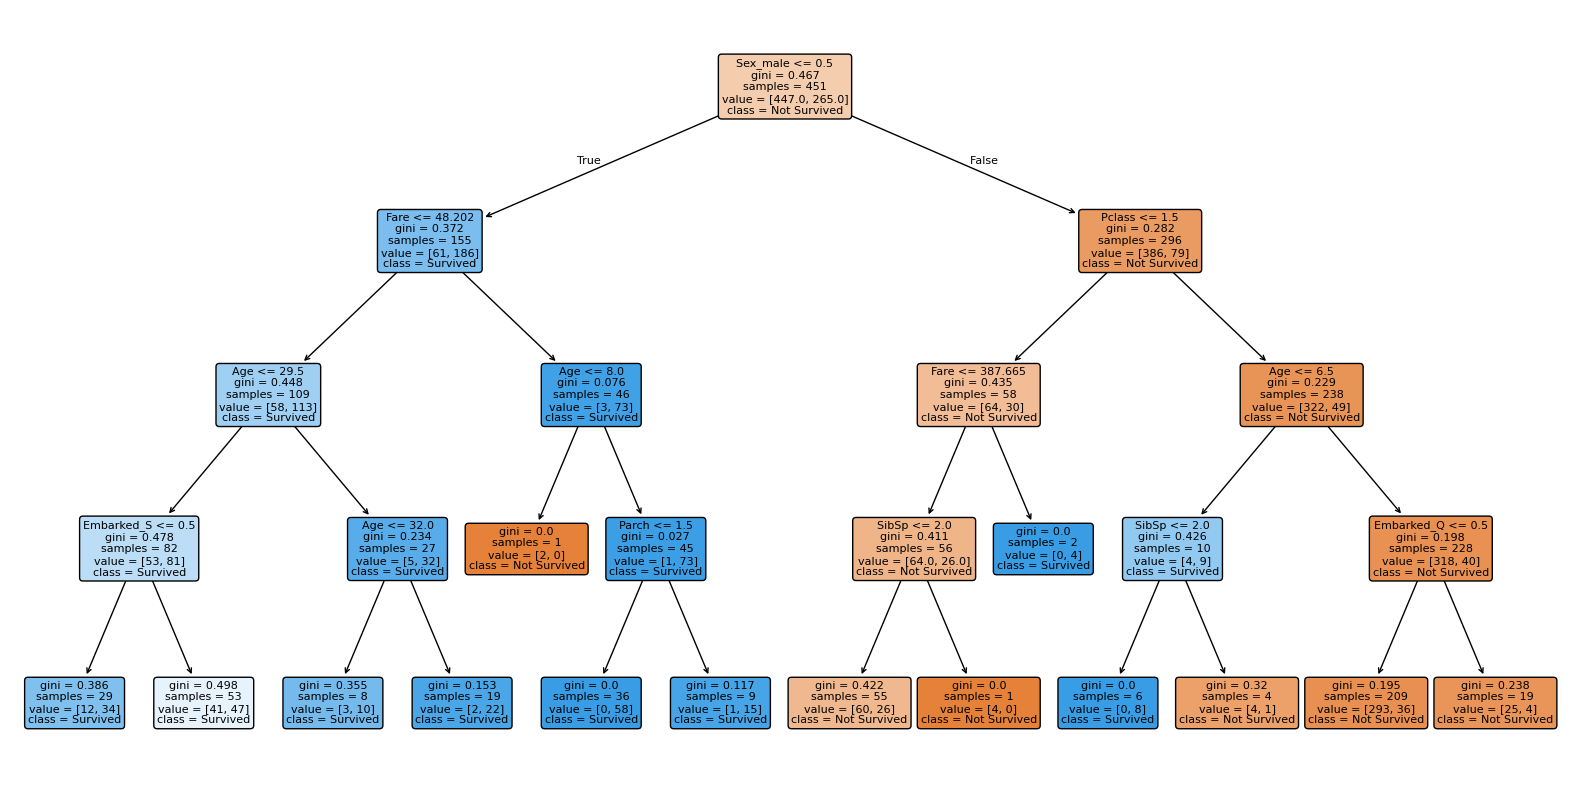

In [ ]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load Titanic dataset
df = pd.read_csv("/content/titanic.csv")   # adjust path if needed

# Preprocessing
df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Convert categorical variables
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

# Features & Target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# 🌲 Visualize ONE tree from the Random Forest
plt.figure(figsize=(20,10))
plot_tree(
    clf.estimators_[0],   # take the first tree
    filled=True,
    feature_names=X.columns,
    class_names=["Not Survived", "Survived"],
    rounded=True,
    fontsize=8
)
plt.show()
